In [1]:
import numpy as np
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.Encapsulation import *
from src.Linear import *
from src.NonLinear import *
from src.Loss import *
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
def load_usps(fn):
    with open(fn,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp=np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)


X_train, y_train = load_usps("data/USPS_train.txt")
X_test, y_test = load_usps("data/USPS_test.txt")
y_train_encode = OneHotEncoder().fit_transform(y_train.reshape(-1, 1)).toarray()
y_test_encode = OneHotEncoder().fit_transform(y_test.reshape(-1, 1)).toarray()

In [3]:
hiddens=[200,100,50,30,20,10]

In [4]:
accuracy={}
losses={}

for hid_dim in hiddens:
    encodeur=[Linear(256,hid_dim),TanH(),Linear(hid_dim,hid_dim),TanH(),Linear(hid_dim,10)]
    network_usps=Sequential(encodeur)
    optim_usps=Optim(network_usps,CrossEntropyLoss(),eps=1e-3)
    results_df=optim_usps.SGD_eval(X_train,y_train_encode,32,1000,True)
    losses[hid_dim]=results_df["loss_train"]
    accuracy[hid_dim]=results_df["score_test"]

Epoch:   0%|          | 0/1000 [00:00<?, ?it/s]

Batch:   0%|          | 0/205 [00:00<?, ?it/s]


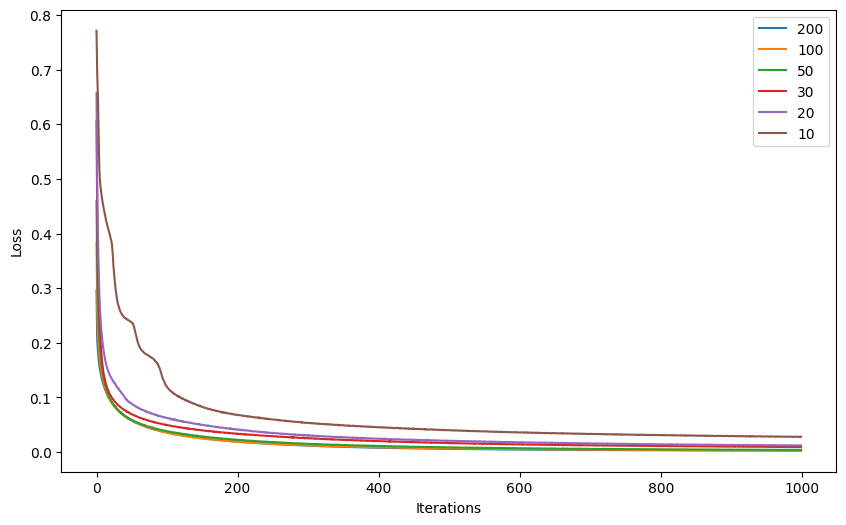

In [6]:
iterations=[i for i in range(1000)]

plt.figure(figsize=(10, 6))

for dim in hiddens:
    plt.plot(iterations,losses[dim],label=str(dim))

plt.xlabel("Iterations")    
plt.ylabel("Loss")
plt.legend(loc='upper right')

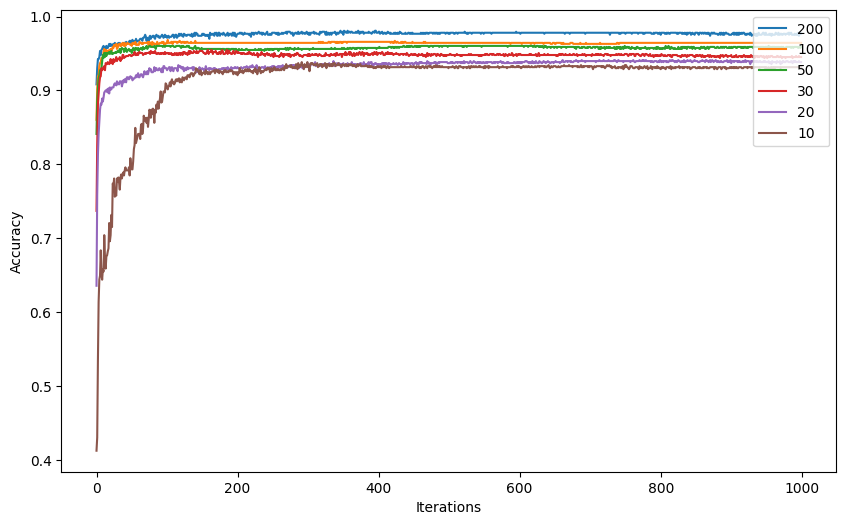

In [7]:
plt.figure(figsize=(10, 6))

for dim in hiddens:
    plt.plot(iterations,accuracy[dim],label=str(dim))

plt.xlabel("Iterations")    
plt.ylabel("Accuracy")
plt.legend(loc='upper right')